In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
GoT = pd.read_csv('got_data3.csv')
GoT.head()


,Season,Episode Number,Number in Season,Episode Name,Director,Writer,Original Air Date,US viewers (million),Runtime (mins),IMDB Description,IMDB votes,Imdb Rating,Notable Death Count
0,1,1,1,Winter Is Coming,Tim Van Patten,David Benioff & D. B. Weiss,"April 17, 2011",2.22,62,"Jon Arryn, the Hand of the King, is dead. King...",27685,9.0,4
1,1,2,2,The Kingsroad,Tim Van Patten,David Benioff & D. B. Weiss,"April 24, 2011",2.20,56,"While Bran recovers from his fall, Ned takes o...",21256,8.8,3
2,1,3,3,Lord Snow,Brian Kirk,David Benioff & D. B. Weiss,"May 1, 2011",2.44,58,Lord Stark and his daughters arrive at King's ...,20090,8.7,0
3,1,4,4,"Cripples, Bastards, and Broken Things",Brian Kirk,Bryan Cogman,"May 8, 2011",2.45,56,Eddard investigates Jon Arryn's murder. Jon be...,19123,8.8,1
4,1,5,5,The Wolf and the Lion,Brian Kirk,David Benioff & D. B. Weiss,"May 15, 2011",2.58,55,Catelyn has captured Tyrion and plans to bring...,20062,9.1,5


In [19]:
GoT.describe()

,Season,Episode Number,Number in Season,US viewers (million),Runtime (mins),IMDB votes,Imdb Rating,Notable Death Count
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,4.205479,37.000000,5.191781,6.446712,57.726027,40185.000000,8.891781,3.178082
std,2.191897,21.217131,2.821827,2.825016,7.251935,44304.997159,0.931360,2.394104
min,1.000000,1.000000,1.000000,2.200000,50.000000,16496.000000,4.100000,0.000000
25%,2.000000,19.000000,3.000000,3.900000,53.000000,18075.000000,8.700000,1.000000
50%,4.000000,37.000000,5.000000,6.640000,56.000000,23207.000000,9.000000,3.000000
75%,6.000000,55.000000,7.000000,7.820000,59.000000,32906.000000,9.400000,4.000000
max,8.000000,73.000000,10.000000,13.610000,82.000000,216879.000000,9.900000,11.000000


In [20]:
GoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                73 non-null     int64  
 1   Episode Number        73 non-null     int64  
 2   Number in Season      73 non-null     int64  
 3   Episode Name          73 non-null     object 
 4   Director              73 non-null     object 
 5   Writer                73 non-null     object 
 6   Original Air Date     73 non-null     object 
 7   US viewers (million)  73 non-null     float64
 8   Runtime (mins)        73 non-null     int64  
 9   IMDB Description      73 non-null     object 
 10  IMDB votes            73 non-null     int64  
 11  Imdb Rating           73 non-null     float64
 12  Notable Death Count   73 non-null     int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 6.1+ KB


### Graphical representation of data of color-coding to represent different values

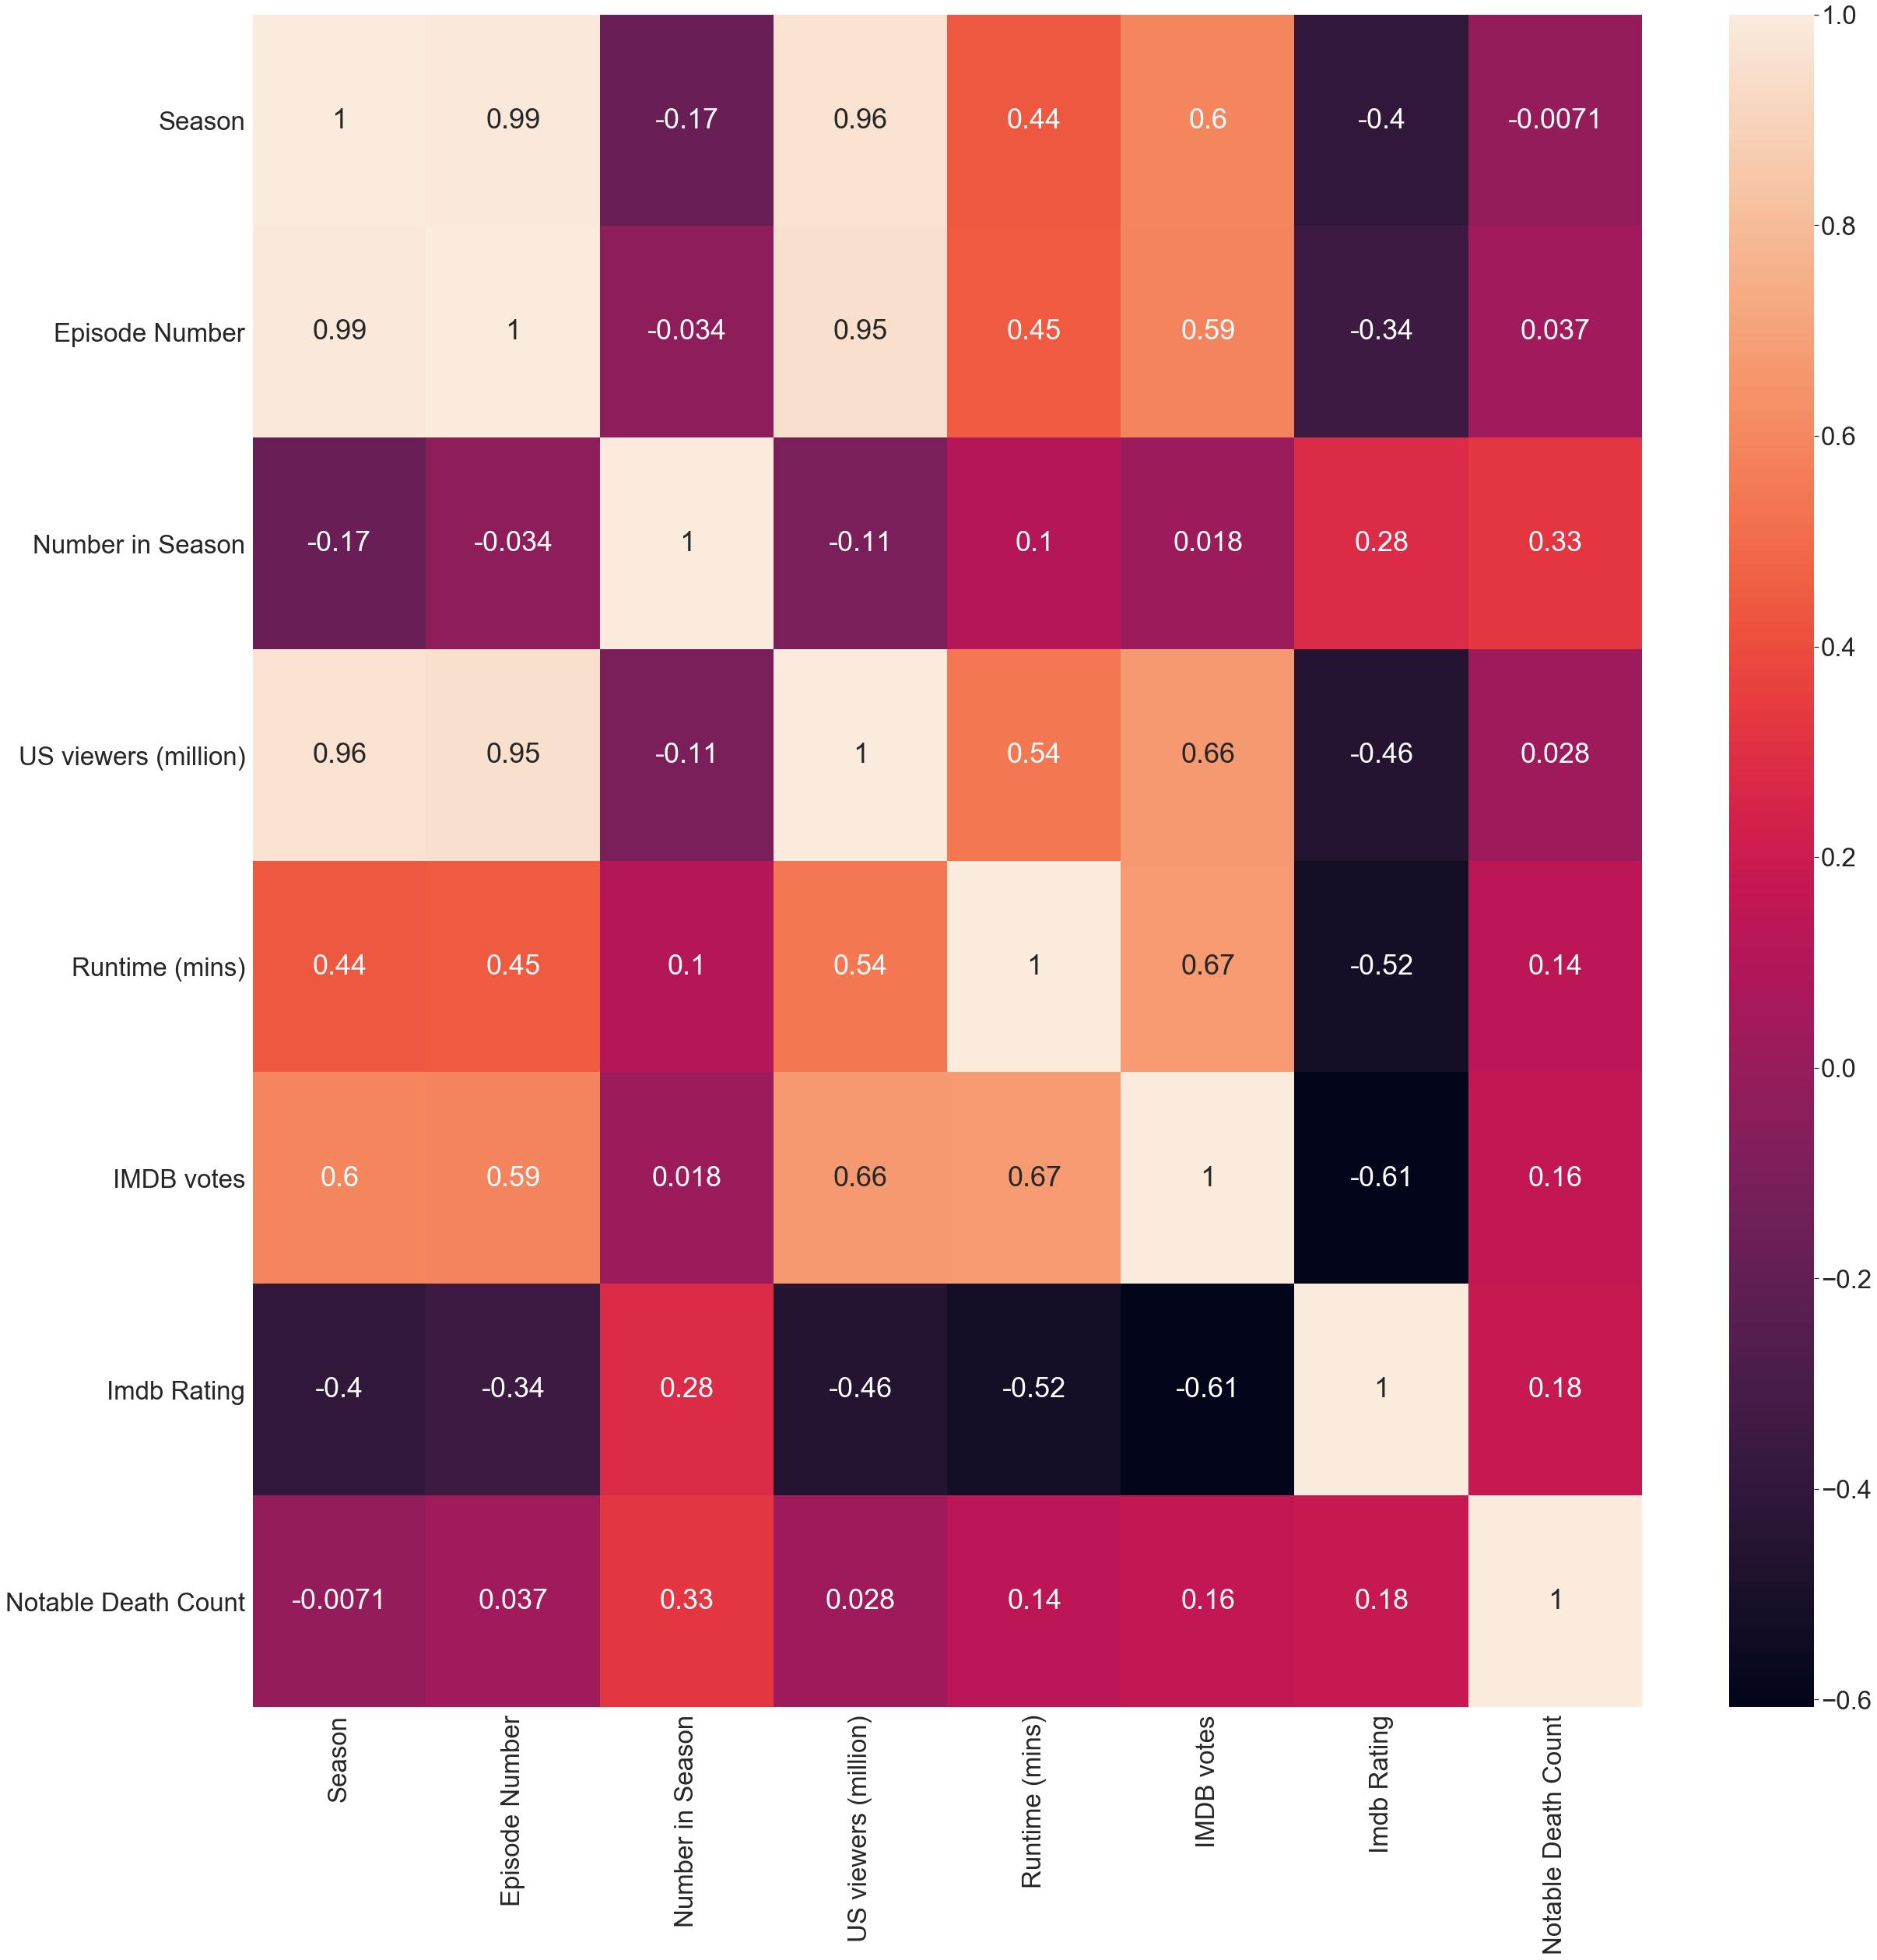

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(GoT.corr(), annot=True)
sns.set(font_scale=3)

In [32]:
GoT.astype({'Imdb Rating': 'int32'}).dtypes


Season                    int64
Episode Number            int64
Number in Season          int64
Episode Name             object
Director                 object
Writer                   object
Original Air Date        object
US viewers (million)    float64
Runtime (mins)            int64
IMDB Description         object
IMDB votes                int64
Imdb Rating               int32
Notable Death Count       int64
dtype: object

### Pairwise Relationships of Dataset

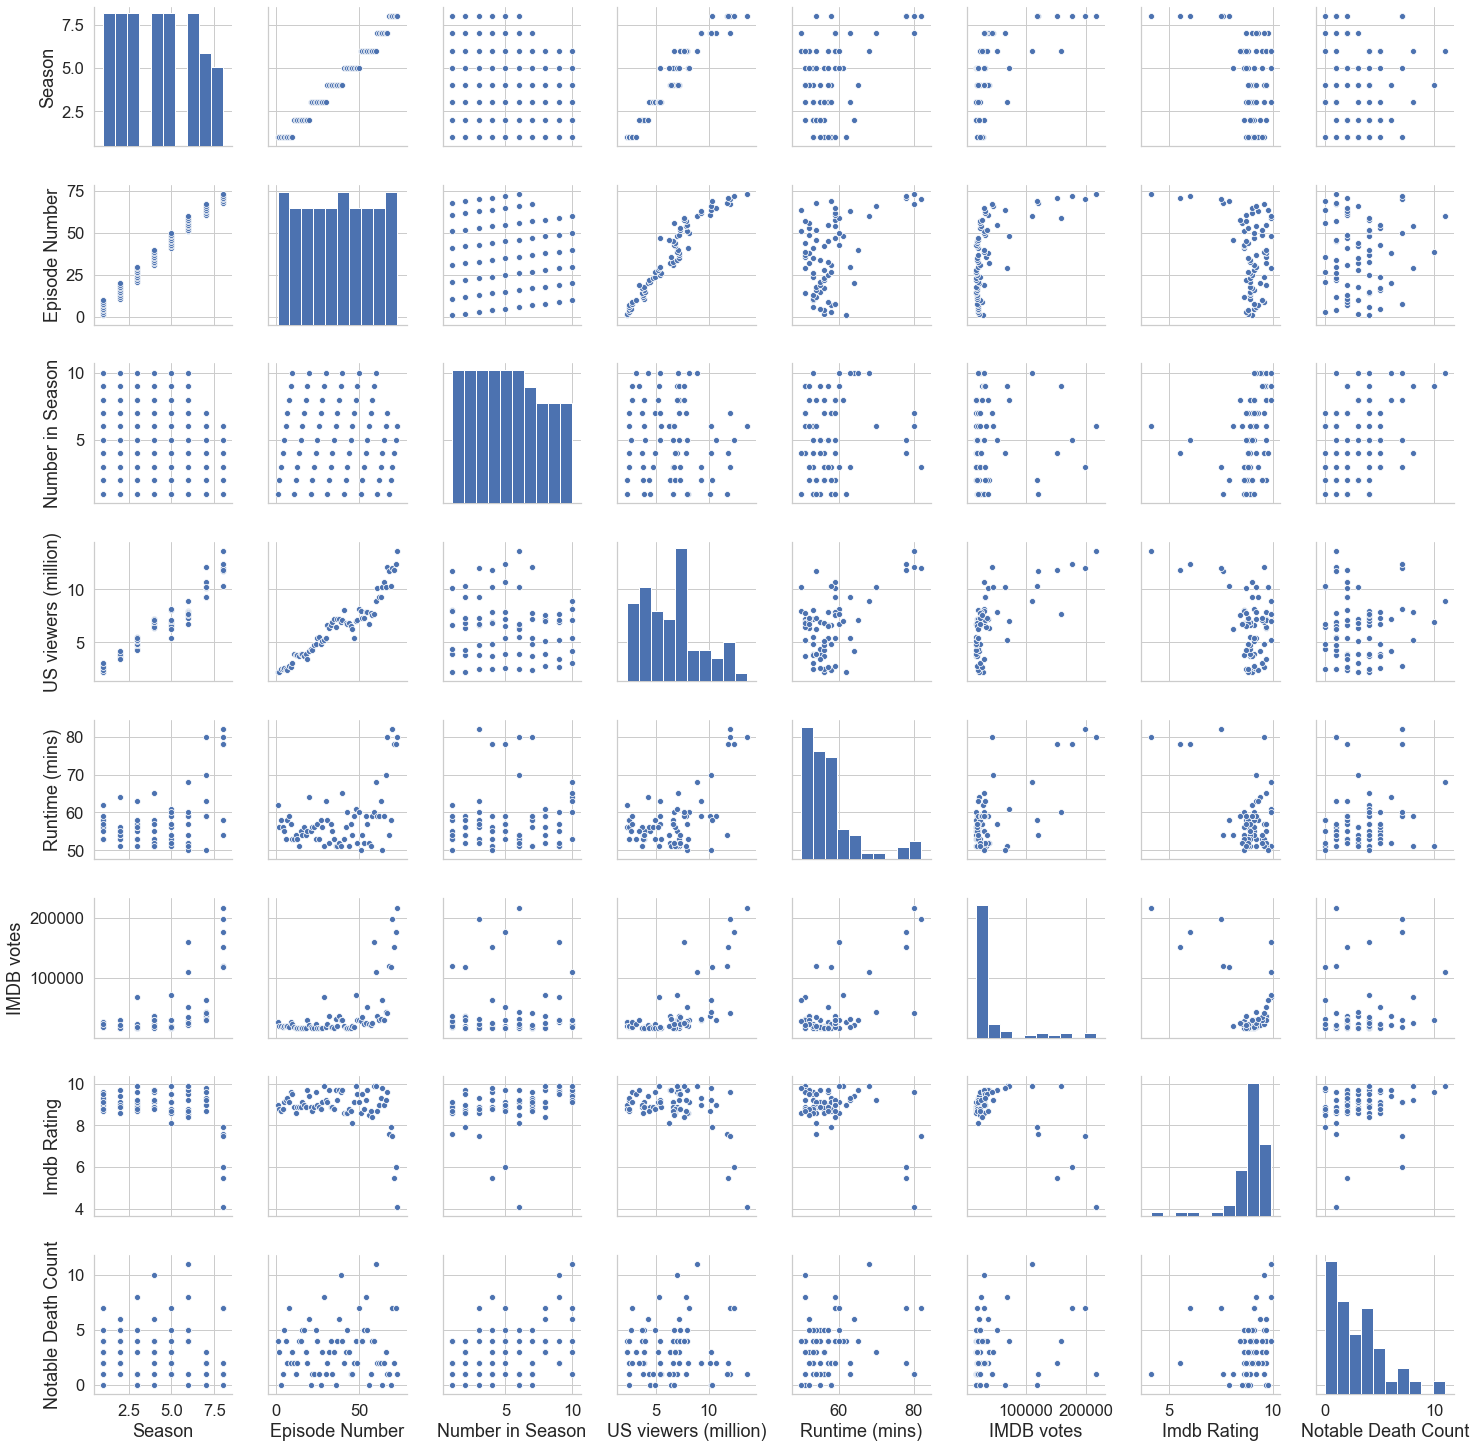

In [48]:
sns.set(font_scale=1.5, style='whitegrid')
sns.pairplot(GoT)

In [49]:
seasonRating = pd.DataFrame(GoT[['Season', 'Imdb Rating']])
avg_s_rtg = seasonRating.groupby(by="Season").mean()
avg_s_rtg

,Imdb Rating
Season,
1,9.110000
2,9.030000
3,9.100000
4,9.330000
5,8.900000
6,9.120000
7,9.228571
8,6.433333


In [55]:
rating = GoT[['Season', 'Episode Number', 'Imdb Rating']]
rating

,Season,Episode Number,Imdb Rating
0,1,1,9.0
1,1,2,8.8
2,1,3,8.7
3,1,4,8.8
4,1,5,9.1
...,...,...,...
68,8,69,7.9
69,8,70,7.5
70,8,71,5.5
71,8,72,6.0


### Episode Number of seasons with Imdb Rating

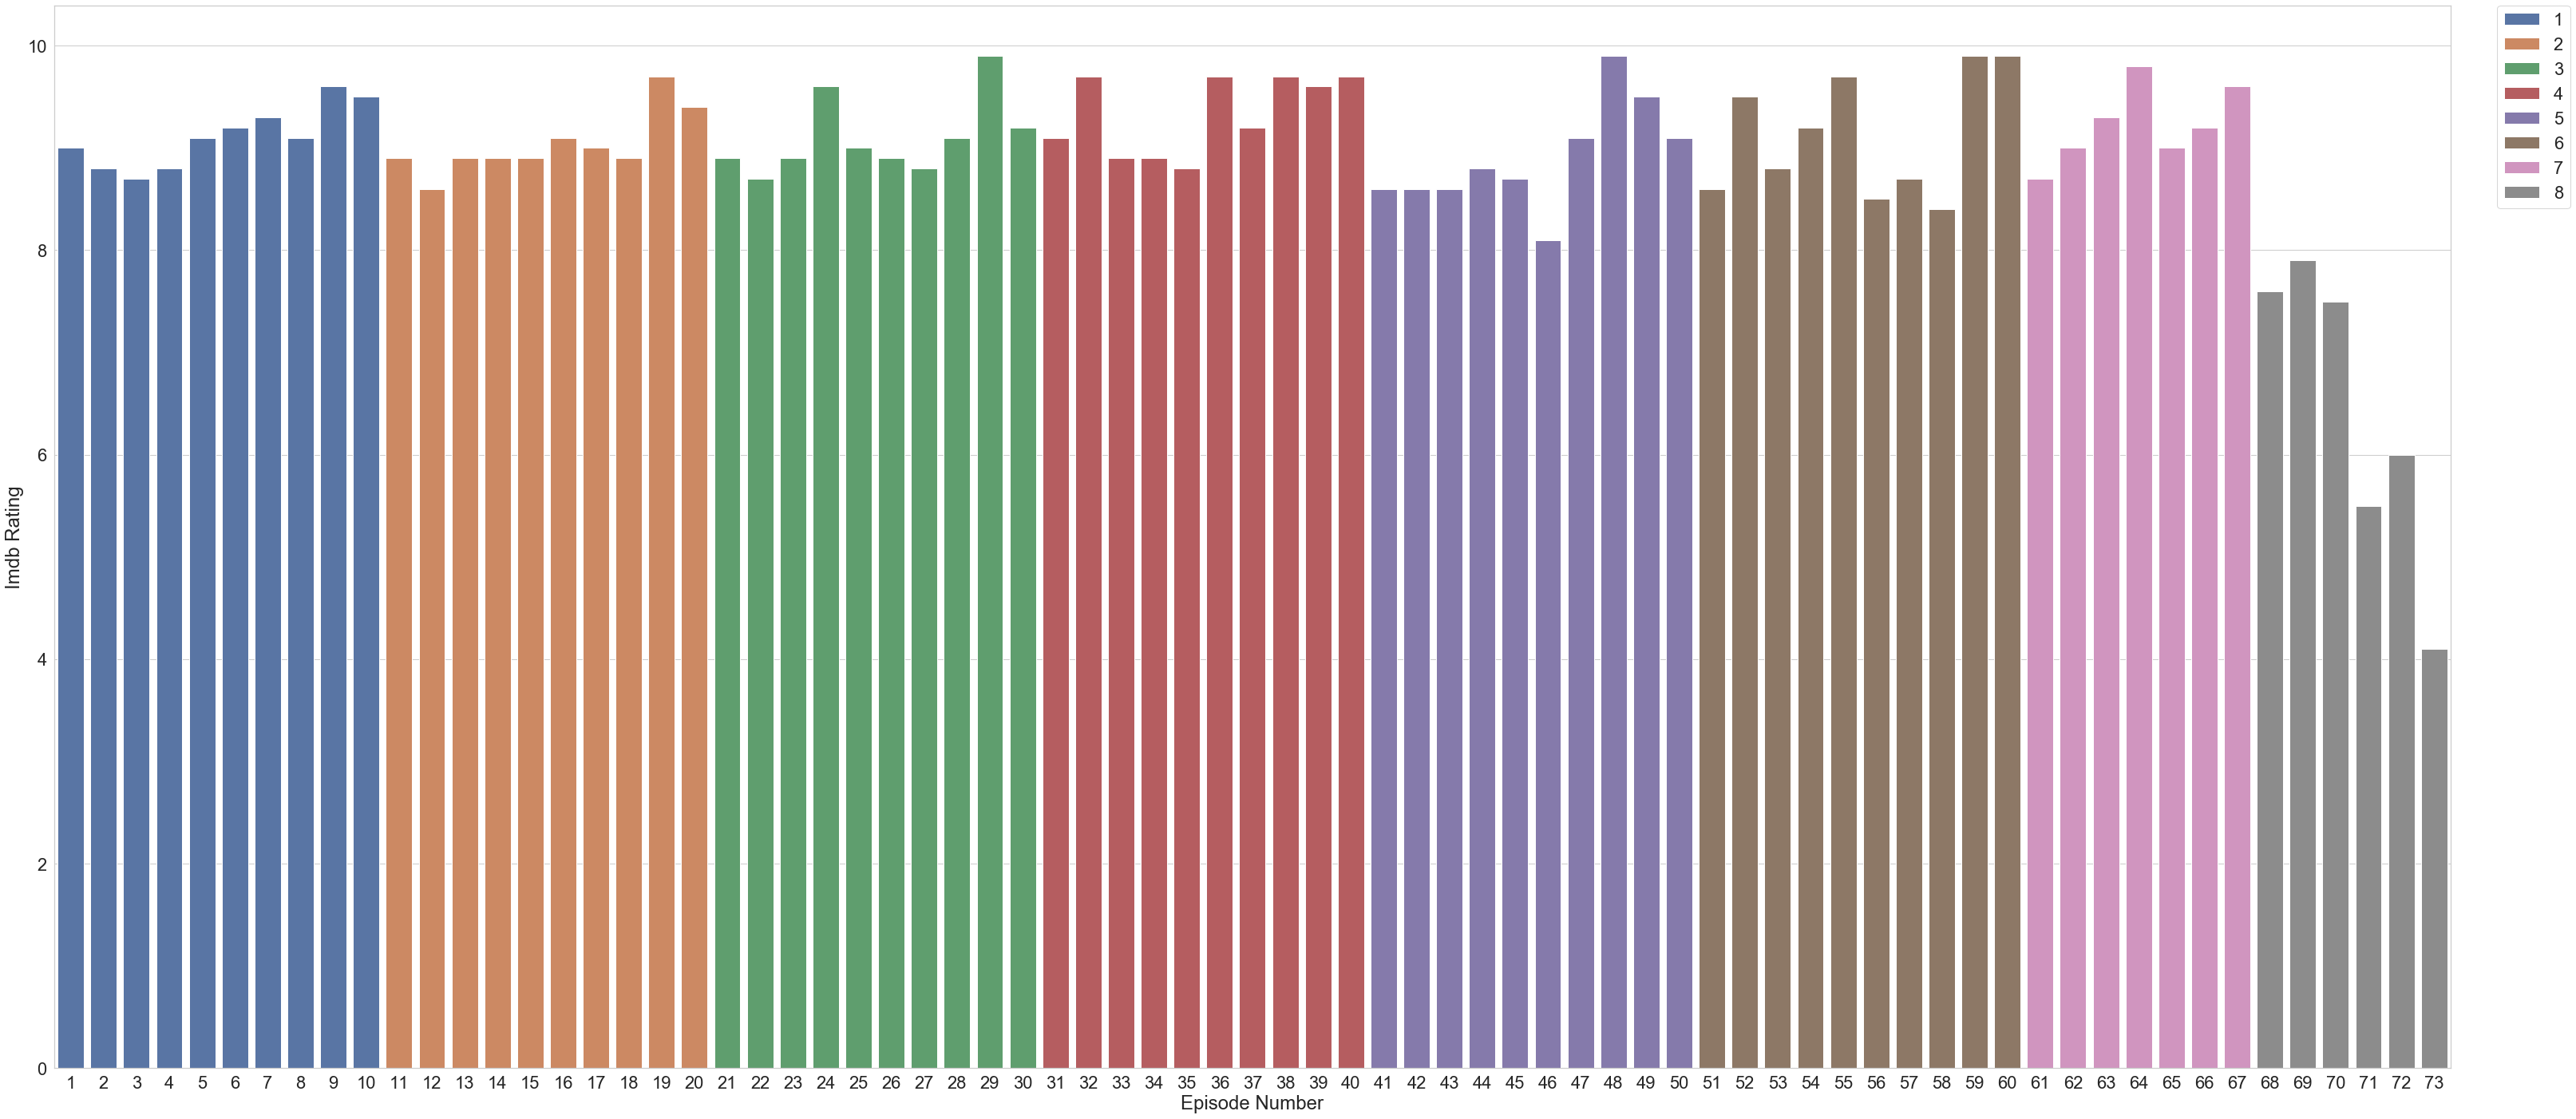

In [60]:
plt.figure(figsize=(45,20))
sns.set(font_scale=2, style='whitegrid')
sns.barplot(x='Episode Number', y='Imdb Rating', hue='Season', data=GoT, dodge=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.tight_layout()